In [1]:
import numpy as np
import matplotlib.pyplot as plt

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import MSW

plt.rcParams['text.usetex']=True
plt.style.use('classic')

frame = FrameWork(resolution_correction=True, masked_val=2.5)
spectrum_data = np.loadtxt('./Data/B8_SuperK_Spectrum_2023.txt')
energy_obs  = spectrum_data[:,0:2]
resp_func   = frame._response_function(energy_obs, frame.energy_recoil)

borom_unoscilated_spectrum = frame._compute_unoscilated_signal(frame.energy_recoil, frame.energy_nu, frame.spectrum_nu, energy_obs, frame.cs_electron, resp_func)

year = 365.25 
total_volume  = 22.5
SNO_norm = 1e-4 * frame.norm

b_un_per_year = year * frame.norm * frame.target_number * borom_unoscilated_spectrum
b_un_per_day = total_volume * SNO_norm * frame.target_number * borom_unoscilated_spectrum

<ErrorbarContainer object of 3 artists>

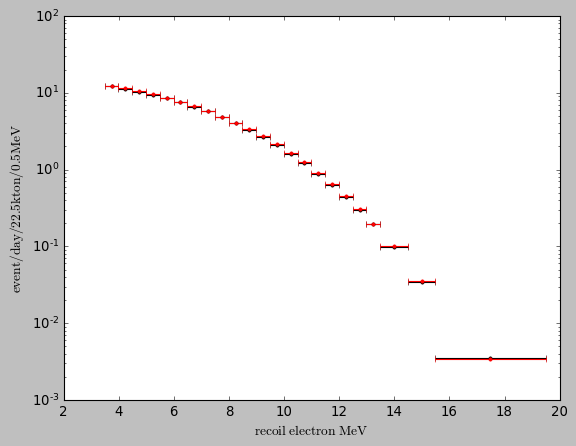

In [2]:
"""
Comparsion between our predection and the paper Phys. Rev. D 109, 092001 (2024).
expected B8 spectrum assuming no oscilation.
"""
plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1]-energy_obs[:,0])) * spectrum_data[:,11]*22.5/365.25, yerr=None, xerr = 0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='k.' )
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1]-energy_obs[:,0])) * b_un_per_day , yerr=None, xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

In [3]:
"""
Comparsion between MSW and unoscilation spectrum.
"""
frame.param.update({'SinT12': 0.308, 'M12': 6.9e-5})
survival_probablity = MSW(frame.param,frame.energy_nu)

integral_electron = np.zeros(len(frame.energy_recoil))
integral_muon  = np.zeros(len(frame.energy_recoil))

for k in range (len(frame.energy_recoil)):
    integral_electron[k] = np.trapz(frame.spectrum_nu[k:] * frame.cs_electron[k,k:] * survival_probablity[k:] ,frame.energy_nu[k:])
    integral_muon[k] = np.trapz(frame.spectrum_nu[k:] * frame.cs_muon[k,k:] * (1-survival_probablity[k:]), frame.energy_nu[k:])

integral_electron_recoil = np.zeros(len(energy_obs))
integral_muon_recoil = np.zeros(len(energy_obs))
for i in range (len(energy_obs)):
    integral_electron_recoil[i] = np.trapz(integral_electron * resp_func[i], frame.energy_recoil)
    integral_muon_recoil[i] = np.trapz(integral_muon * resp_func[i], frame.energy_recoil)

spectrum_event_per_day =  total_volume * SNO_norm * frame.target_number * (integral_electron_recoil + integral_muon_recoil)

<ErrorbarContainer object of 3 artists>

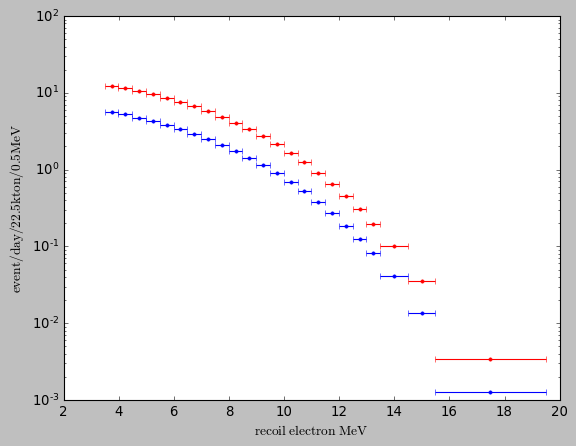

In [4]:
"""
B8 spectrum
"""
plt.yscale('log')
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1]-energy_obs[:,0])) * spectrum_event_per_day, yerr=None, xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='b.')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (0.5/(energy_obs[:,1]-energy_obs[:,0])) * b_un_per_day , yerr=None,  xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

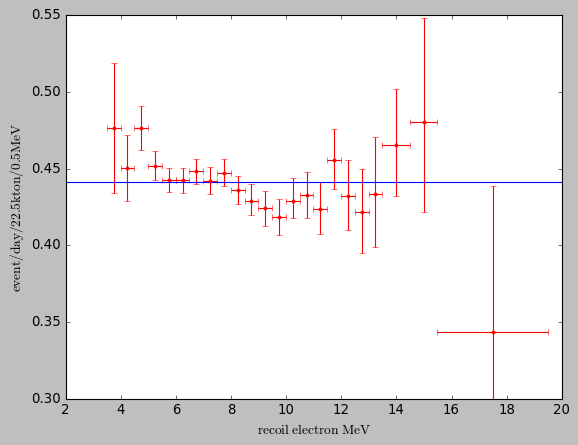

In [5]:
"""data illustration : B8 and hep
"""
plt.ylim(0.3,0.55)
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), spectrum_data[:,2]/(spectrum_data[:,11]+spectrum_data[:,12]), yerr=np.array([spectrum_data[:,4],spectrum_data[:,3]])/(spectrum_data[:,11]+spectrum_data[:,12]), xerr=0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')
plt.hlines(xmin=2,xmax=20,y=0.441)

<ErrorbarContainer object of 3 artists>

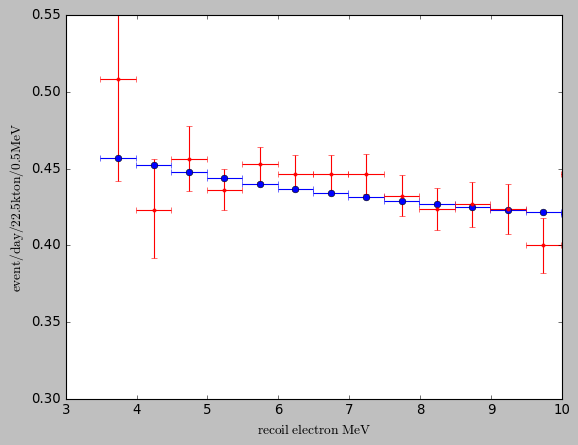

In [6]:
"""Observed B8_per_day spectrum data and MSW prediction"""

plt.xlim(3,10)
plt.ylim(0.3,0.55)
plt.ylabel(r'$\rm event/day/22.5kton/0.5MeV$')
plt.xlabel(r'$\rm recoil \ electron \ MeV$')

plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), (integral_electron_recoil+integral_muon_recoil)/borom_unoscilated_spectrum, yerr=None, xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='bo')
plt.errorbar(0.5*(energy_obs[:,1]+energy_obs[:,0]), spectrum_data[:,5]/(spectrum_data[:,11]), yerr= np.array([spectrum_data[:,7],spectrum_data[:,6]])/(spectrum_data[:,11]), xerr =0.5*(energy_obs[:,1]-energy_obs[:,0]), fmt='r.')

In [7]:
print('day')
print(np.mean(spectrum_data[:13,5]/(spectrum_data[:13,11])))

print('night')
print(np.mean(spectrum_data[:13,8]/(spectrum_data[:13,11])))

print('all')
print(np.mean(spectrum_data[:13,2]/(spectrum_data[:13,11])))

day
0.4401861018176158
night
0.4514941738978083
all
0.44620659387043743


In [8]:
print('prediction')
print(np.mean(((integral_electron_recoil+integral_muon_recoil)/borom_unoscilated_spectrum)[:13]))

prediction
0.43602832772512784
